## Intro into Embeddings



In [1]:
import openai
from dotenv import load_dotenv
import os
from IPython.display import display, HTML, JSON, Markdown

load_dotenv()
# env variables that are used by LangChain
os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY")
os.environ['OPENAI_API_TYPE'] = "azure"
os.environ['OPENAI_API_VERSION'] = os.getenv("OPENAI_DEPLOYMENT_VERSION")
os.environ['OPENAI_API_BASE'] = os.getenv("OPENAI_DEPLOYMENT_ENDPOINT")

OPENAI_ADA_EMBEDDING_DEPLOYMENT_NAME = os.getenv("OPENAI_ADA_EMBEDDING_DEPLOYMENT_NAME")
OPENAI_ADA_EMBEDDING_MODEL_NAME = os.getenv("OPENAI_ADA_EMBEDDING_MODEL_NAME")

# Configure OpenAI API
openai.api_type = "azure"
openai.api_version = os.getenv("OPENAI_DEPLOYMENT_VERSION")
openai.api_base = os.getenv("OPENAI_DEPLOYMENT_ENDPOINT")
openai.api_key = os.getenv("OPENAI_API_KEY")

#### Init Embeddings model



In [2]:

from langchain.embeddings.openai import OpenAIEmbeddings

#init embedding model
embeddings = OpenAIEmbeddings(
    model=OPENAI_ADA_EMBEDDING_DEPLOYMENT_NAME, chunk_size=1)

In [3]:
text1 = "I ate apples"
text2 = "He bought a new car"
text3 = "She eats an orange"

#### Calculate embeddings and compare them with cosine similarity

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
    
emb_text1 = embeddings.embed_query(text1)
emb_text2 = embeddings.embed_query(text2)
emb_text3 = embeddings.embed_query(text3)

#Calculate the similarity between two sentences
score12 = cosine_similarity([emb_text1], [emb_text2])
score13 = cosine_similarity([emb_text1], [emb_text3])
score23 = cosine_similarity([emb_text2], [emb_text3])

print(f"score12={score12}, score13={score13}, score23={score23}")

score12=[[0.7840357]], score13=[[0.8658852]], score23=[[0.78012263]]


In [5]:
#convert to numpy array:
emb_array = np.array([emb_text1,emb_text2,emb_text3])
emb_array.shape

(3, 1536)

#### Visualize the embeddings in 2D

In [6]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
#PCA compresses the embeddings into 2 dimensions from 1536 dimensions
PCA_model = PCA(n_components = 2)
PCA_model.fit(emb_array)
emb_compressed = PCA_model.transform(emb_array)
emb_compressed.shape

(3, 2)

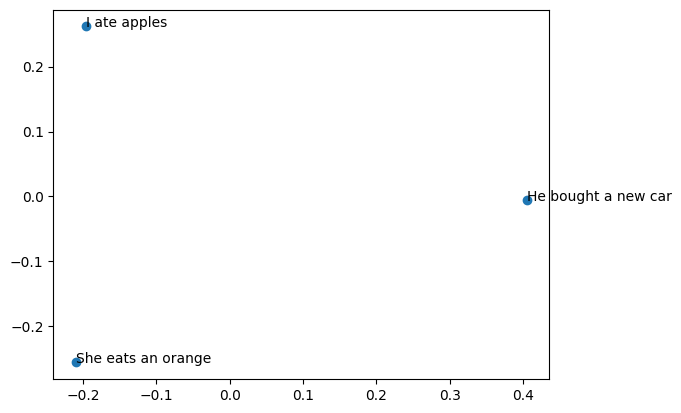

In [8]:
import matplotlib.pyplot as plt
import mplcursors

texts = [text1, text2, text3]
# Plot the embeddings in 2D
fig, ax = plt.subplots()
plt.scatter(emb_compressed[:,0], emb_compressed[:,1])
# Labeling the points
for i, txt in enumerate(texts):
    ax.annotate(txt, (emb_compressed[i,0], emb_compressed[i,1]))

mplcursors.cursor(hover=True)
plt.show()


###### Ex. Try out your own sentences and check the similarity